## Calculates redundancy of features

In [1]:
import pandas as pd
import os
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Get feature summary dataframe
dir_in_res = '../out/20.0216 feat/reg_rf_boruta'
dir_in_anlyz = os.path.join(dir_in_res, 'anlyz_filtered')
df_featSummary = pd.read_csv(os.path.join(dir_in_anlyz, 'feat_summary.csv')) #feature summary
df_featSummary['feat_sources'] = df_featSummary['feat_sources'].apply(literal_eval)
df_featSummary['feat_genes'] = df_featSummary['feat_genes'].apply(literal_eval)

src_colors = {'CERES':(214/255, 39/255, 40/255, 1.0), #red
              'RNA-seq':(31/255, 119/255, 180/255, 1.0), #blue
              'CN':(255/255, 127/255, 14/255, 1.0), #orange
              'Mut':(44/255, 160/255, 44/255, 1.0), #green
              'Lineage':(188/255, 189/255, 34/255, 1.0), #yellow
              'nan':(220/255, 220/255, 220/255, 1.0)} #grey

In [86]:
### Get feature source and feature gene dataframe
# Feature source
df_source = df_featSummary.loc[:,df_featSummary.columns.str.contains(r'feat_source\d')].copy()
source_vals = [v for v in pd.melt(df_source).value.unique() if v is not np.nan]
df_source.columns = range(1,11)

# Feature gene
df_gene = df_featSummary.loc[:,df_featSummary.columns.str.contains(r'feat_gene\d')].copy()
df_gene.columns = range(1,11)

In [87]:
# Add all feature and gene counts
n_feat = [sum(df_source.count(axis='columns'))]
n_uniq_gene = [pd.melt(df_gene)['value'].nunique()]

for v in source_vals:
    fc = sum(df_source[df_source==v].count())
    gc = pd.melt(df_gene[df_source==v])['value'].nunique()
    n_feat.append(fc)
    n_uniq_gene.append(gc)
    
# Calculate redundancy
score_redun = [round(t/i,3) if i else np.nan for i, t in zip(n_uniq_gene, n_feat) ]
score_unq = [round(i/t,3) if t else np.nan for i, t in zip(n_uniq_gene, n_feat) ]

In [91]:
# Redundancy dataframe
df_redun = pd.DataFrame({'feature': ['all'] + source_vals,
                         'uniq_gene_count': n_uniq_gene,
                         'feature_count': n_feat,
                         'uniqueness_score': score_unq,
                         'redundancy_score': score_redun})
df_redun

,feature,uniq_gene_count,feature_count,uniqueness_score,redundancy_score
0,all,1790,3305,0.542,1.846
1,CERES,1044,2426,0.430,2.324
2,RNA-seq,628,723,0.869,1.151
3,CN,150,150,1.000,1.000
4,Mut,4,6,0.667,1.500


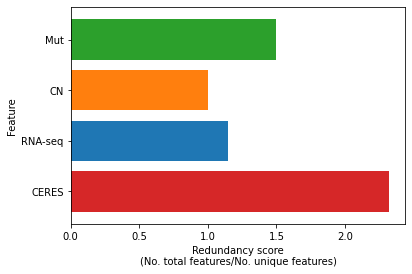

In [98]:
# Plot redundancy score - features
df_rd = df_redun.loc[df_redun.feature.isin(source_vals),:]
ax = df_rd.plot.barh(x='feature', y='redundancy_score', width = 0.8,
                     color = [src_colors[c] for c in df_rd.feature], legend = None)
ax.set_xlabel('Redundancy score\n(No. total features/No. unique features)')
ax.set_ylabel('Feature')
plt.show()